In [7]:
# ---------------------------------------------------------
# XGBoost Example: Predicting House Prices with Boosted Trees 🏡🌲
# ---------------------------------------------------------
# Goal: Use XGBoost to predict house prices based on features like square footage, number of bedrooms, etc.
# This example walks through the entire ML pipeline using our custom wrapper around XGBoost.
# XGBoost (Extreme Gradient Boosting) is an ensemble learning algorithm built on gradient boosting principles.
# We'll explain that in detail as we go 👇

# ---------------------------------------------------------
# 📦 Imports
# ---------------------------------------------------------
# numpy: for efficient numerical operations
# pandas: useful for structured data manipulation (not directly used here, but typically used with real datasets)
# matplotlib: for plotting the model’s predictions
# train_test_split: splits data into training and test sets
# mean_squared_error, r2_score: regression evaluation metrics
# XGBoostModel: our custom class wrapping XGBoost logic (from previous code block)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost_module import XGBoostModel  # Our wrapper (see first code block you gave)

In [8]:
# ---------------------------------------------------------
# 🏗 Step 1: Generate synthetic housing data
# ---------------------------------------------------------
np.random.seed(42)  # Reproducible randomness (important for consistent model testing)

# Generating synthetic features:
# - square_feet: random value between 500 and 3500
# - bedrooms: 1–5 bedrooms
# - bathrooms: 1–4 bathrooms
# - age: 0–50 years old

n_samples = 100
square_feet = np.random.randint(500, 3500, size=(n_samples, 1))
bedrooms     = np.random.randint(1, 6, size=(n_samples, 1))
bathrooms    = np.random.randint(1, 5, size=(n_samples, 1))
age          = np.random.randint(0, 51, size=(n_samples, 1))

# Combine all the features into one input matrix X
X = np.hstack([square_feet, bedrooms, bathrooms, age])

# Create target variable `y` (price) using a simple linear formula + random noise
# This simulates real-world noisy data
true_weights = np.array([150, 10000, 7000, -500]).reshape(-1, 1)  # Hypothetical influence of each feature
price = X.dot(true_weights)  # Linear combination (matrix multiplication)
noise = np.random.normal(0, 10000, size=price.shape)  # Normally-distributed noise
y = price + noise  # Final price with noise

In [9]:
# ---------------------------------------------------------
# 🔀 Step 2: Split into training and test sets
# ---------------------------------------------------------
# Purpose: Evaluate how well the model generalizes to unseen data
# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# ---------------------------------------------------------
# 🌳 Step 3: Train XGBoost model
# ---------------------------------------------------------

# ABOUT GRADIENT BOOSTING 🌄
# ---------------------------------------------------------
# Gradient Boosting is an ensemble method:
# - It builds decision trees **sequentially**
# - Each new tree focuses on the **residuals** (errors) of the previous ensemble
# - The algorithm minimizes a loss function (like squared error) using gradient descent
# - Intuition: Fit a tree → see where it's wrong → fit another tree to fix it → repeat

# XGBoost (Extreme Gradient Boosting) is a faster, more accurate version of this:
# ✅ Uses regularization (L1/L2) to prevent overfitting
# ✅ Parallel processing for training trees quickly
# ✅ Optimized tree pruning and memory usage
# ✅ Handles sparse/missing data automatically
# ✅ Scales to huge datasets

# Instantiate the model (defaults to regression)
model = XGBoostModel()  # Uses XGBRegressor internally

# Train the model on our synthetic housing data
# Internally, XGBoost builds 100 trees, each trying to improve over the last!
model.train(X_train, y_train)

In [11]:
# ---------------------------------------------------------
# 📈 Step 4: Predict and evaluate
# ---------------------------------------------------------

# Use trained model to predict prices for test data
y_pred = model.predict(X_test)


# 🧮 Mean Squared Error (MSE) and R² Score Explained

# 1. Mean Squared Error (MSE):
# ---------------------------
# - MSE calculates the average of the squared differences between actual values (y) and predicted values (ŷ).
# - Formula: MSE = (1/n) * Σ(y_i - ŷ_i)^2 where i goes from 1 to n samples.
# - Intuition: It measures how far off the model’s predictions are on average.
# - Squaring errors penalizes large mistakes more heavily and ensures all errors are positive.
# - Example: If actual prices are [200k, 250k, 300k] and predicted are [210k, 260k, 310k], errors are 10k each, so MSE would be 100 million.
# - Note: MSE is in squared units of the target variable (e.g., dollars²), which can be less intuitive.
# - Pros: Simple, easy to calculate, useful for optimization.
# - Cons: Sensitive to outliers and error magnitude can be hard to interpret due to squaring.

# 2. R² Score (Coefficient of Determination):
# -------------------------------------------
# - R² indicates the proportion of variance in the target variable explained by the model.
# - Formula: R² = 1 - (Sum of Squared Residuals / Total Sum of Squares)
#   where:
#     - Sum of Squared Residuals = Σ(y_i - ŷ_i)^2 (errors)
#     - Total Sum of Squares = Σ(y_i - mean(y))^2 (variance of actual data)
# - Intuition: 
#     - R² = 1 means perfect prediction (all variance explained).
#     - R² = 0 means model predictions are no better than simply guessing the average value.
#     - R² < 0 means model is worse than guessing the average.
# - Example: R² = 0.92 means 92% of the variability in the target is captured by the model.
# - Pros: Unitless, easy to interpret as "percentage of explained variance."
# - Cons: Does not show error size, can be misleading with outliers or across different datasets.

# 3. Summary and Practical Advice:
# --------------------------------
# - MSE gives you a sense of “how big are your prediction errors” but in squared units.
# - R² tells you “how well your model explains the variability in the data” as a percentage.
# - Use both together to get a full picture: MSE for error magnitude, R² for goodness of fit.
# - Lower MSE and higher R² are better.

# mse = mean_squared_error(y_test, y_pred)
# r2  = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"🧮 Mean Squared Error: {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

🧮 Mean Squared Error: 256683331.22
✅ R² Score: 0.9830


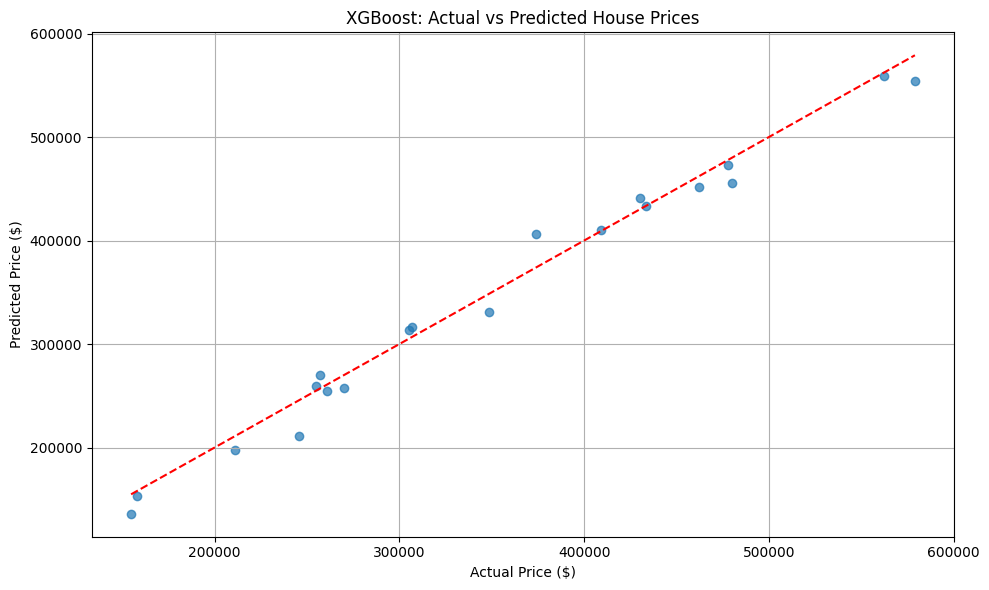

In [12]:
# ---------------------------------------------------------
# 📊 Step 5: Plot predictions vs actual values
# ---------------------------------------------------------

# Visualizing predicted prices vs actual prices to evaluate how well the model did
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  # Scatter of predicted vs actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Ideal line: prediction = actual
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("XGBoost: Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
